<a href="https://colab.research.google.com/github/TAUforPython/stohasticsignal/blob/main/stochastic_Hermite_approx.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://ndcbe.github.io/cbe67701-uncertainty-quantification/09.01-Contributed-Example.html

In [1]:
## import all needed Python libraries here
import numpy as np
from scipy.special import eval_hermitenorm,eval_hermite
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(250)

In [2]:
# function to calcualte the hermite expansion coefficient
def calc_hermite_coefficient1(aPoints, aWeights,f,mu=0.0,sigma = 1.0,coefIndex = 0):
    
    '''
    A function to calculate the hermite expansion coefficients.
    Inputs:
        1. aPoints: an array of quadrature points from Gauss-Hermite quadrature rule. (numpy array)
        2. aWeights: an array of quadrature weights from Gauss-Hermite quadrature rule. (numpy array)
        3. f: QoI. (python function)
        4. mu: mean of the Gaussian distribution (float)
        5. sigma: standard deviation of the Gaussian distribution (float)
        6. coefIndex: expansion coefficient index (int)
    Output:
        1. c_n
    '''
    
    # calculate the inner product using Eqn 9.14
    inner_product = sum(aWeights[i] \
                     * f(aPoints[i][0] * sigma + mu)\
                     * eval_hermite(coefIndex, aPoints[i][0])
                      for i in range(aPoints.shape[0]))
    
    return inner_product/(np.sqrt(np.pi) * 2**coefIndex * np.math.factorial(coefIndex))

In [3]:
# use hermite expansion to approximate given coefficient
def hermite_expand(x,expansion_coef):
    '''
    A function to evaluate the value of QoI using Hermite expansion.
    
    Inputs:
        1. x: point that needs to be evaluate
        2. expansion_coef: an array of quadrature weights from Gauss-Hermite quadrature rule. (numpy array)
    Output:
        1. Value of QoI at point x
    '''
    
    accumulate = 0
    for idx, coef in enumerate(expansion_coef):
        accumulate += coef * eval_hermite(idx,x)
    return accumulate

In [10]:
# declare number of dimension and number of quadrature points
iDim = 1
iLevel = 12

# get the quadrature points and weights
aPoints, aWeights = np.polynomial.hermite.hermgauss(iLevel + 1)
aPoints = aPoints.reshape(-1,1)

# declare the mean and variance of the normal distribution
mu = 0.5
var = 4

# specifiy number of samples
numSamples = 10000

# generate samples from standard Gaussian space
sample_standard = np.random.normal(0,1,size = numSamples)

# convert samples
samples = sample_standard * var**0.5 + mu


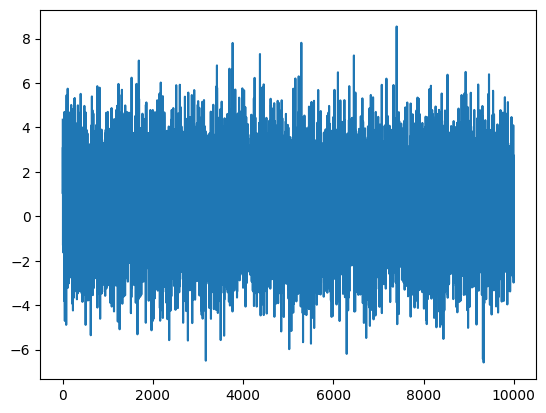

In [11]:
plt.plot(samples)

In [35]:
# functions we want to approximate
def f(x):
  return x

# declare number of terms needed
numTerms = 3

# calculate the expansion coefficient
expansion_coef1 = [calc_hermite_coefficient1(aPoints,\
                                             aWeights,\
                                             f = f, \
                                             mu = mu,\
                                             sigma = var**0.5,\
                                             coefIndex = i) for i in range(numTerms)]

# use hermite expansion to calculate QoI
approx = [hermite_expand(x,expansion_coef1) for x in sample_standard]

<Axes: ylabel='Count'>

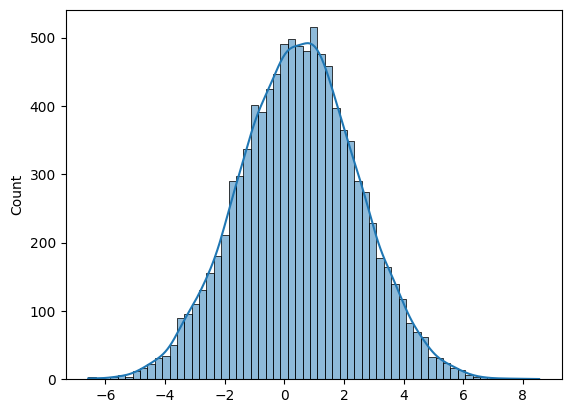

In [22]:
sns.histplot(f(samples), kde = True)

<Axes: ylabel='Count'>

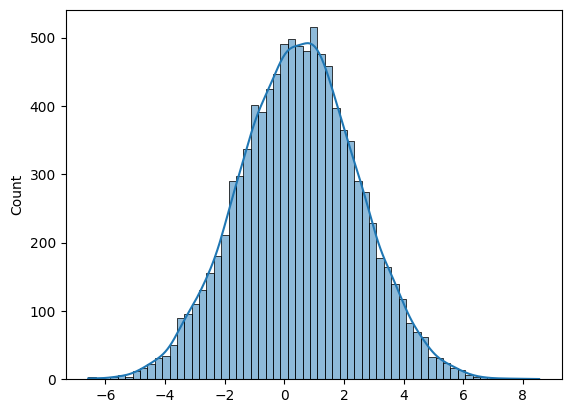

In [36]:
sns.histplot(approx, kde = True)

<Axes: ylabel='Count'>

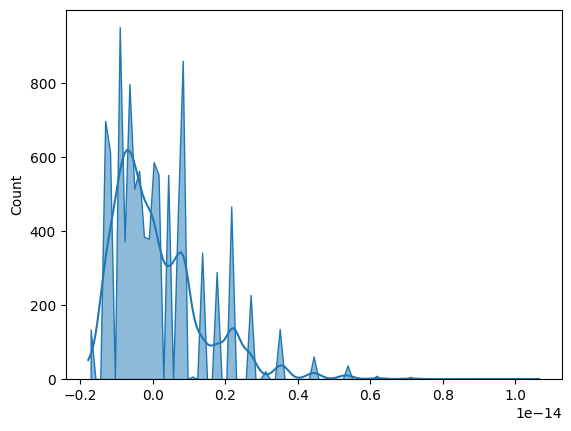

In [37]:
sns.histplot(approx - f(samples), kde = True, element="poly")